In [1]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

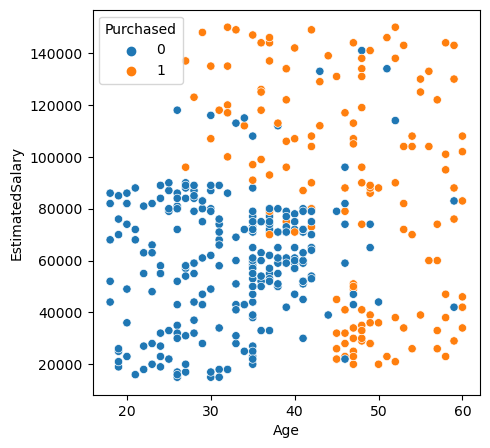

In [8]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = df, x = 'Age', y = 'EstimatedSalary', hue = 'Purchased')

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

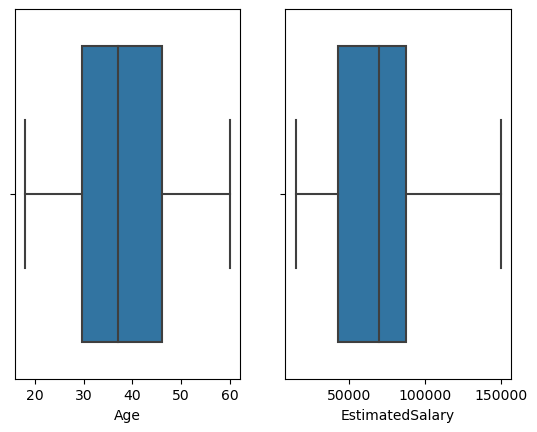

In [9]:
plt.subplot(1,2,1)
sns.boxplot(df.Age)
plt.subplot(1,2,2)
sns.boxplot(df.EstimatedSalary)

In [10]:
gender_encode = pd.get_dummies(df['Gender'])
df = pd.concat([df, gender_encode], axis = 1)
df.drop(['Gender'], axis = 1, inplace = True)

In [11]:
df.head(3)

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0


**Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['Purchased','User ID'], axis = 1)
y = df[['Purchased']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
names = X_train.columns

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns = [names])
X_test = pd.DataFrame(X_test, columns = [names])

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

**Fitting Logistic Regression to the Training set**

In [22]:
lr.fit(X_train, y_train)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Step 3 | Predection**

In [23]:
y_pred = lr.predict(X_test)

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [24]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


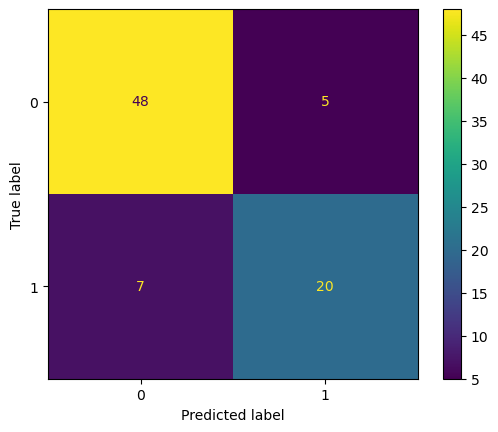

In [25]:
plot_confusion_matrix(lr, X_test, y_test)

**Visualization**

In [26]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [27]:
from mlxtend.plotting import plot_decision_regions    # used to plot the decision boundary of ml algorithms

In [30]:
def logistic_plot(data):
    x = data[['EstimatedSalary','Age']].values
    y = data['Purchased'].astype(int).values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    lr = LogisticRegression()
    lr.fit(x, y)
    plot_decision_regions(x_train, y_train, clf = lr, legend=2)
    plt.xlabel('Salary')
    plt.ylabel('Age')
    plt.title('Losgistic Regression decision boundary')
    plt.show() 

C:\Users\wiki\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


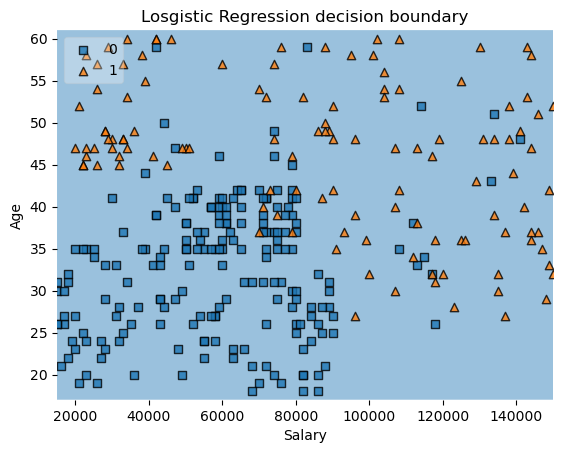

In [31]:
logistic_plot(data = df)

In [34]:
def logistic_test_plot(data):
    x = data[['EstimatedSalary','Age']].values
    y = data['Purchased'].astype(int).values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    plot_decision_regions(x_test, y_pred, clf = lr, legend=2)
    #plot_decision_regions(x_test, y_test, clf = svm, legend=2)
    plt.xlabel('Salary')
    plt.ylabel('Age')
    plt.title('SVM decision boundary')
    plt.show() 

C:\Users\wiki\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


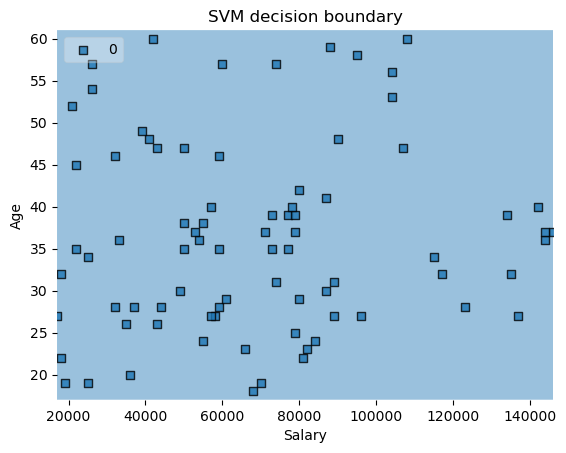

In [35]:
logistic_test_plot(data = df)